# Library Import

In [1]:
#-- Basics Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os 

#-- Warnings OFF
from warnings import simplefilter


from sklearn.preprocessing import MinMaxScaler



%matplotlib inline

# Function definition

In [2]:
def df_transform(path, name):
  '''
    O conjunto de dados em relação aos rios é composto por duas séries
    históricas, cada uma representa a vazão média em [m^3/ s] de um
    determinado mês das usinas hidroelétricas de Furnas e Camargos. Estas
    séries históricas apresentam alta correlação que pode ser explicada pelo
    fato de que ambas as usinas estão situadas no Rio Grande, na bacia do
    Rio Paraná. Os dados são de 82 anos do histórico de operação dessas duas
    usinas hidroelétricas, totalizando 984 amostras mensais desde janeiro de
    1931 até dezembro de 2012, adquiridos pela ONS (Operador Nacional do
    Sistema Elétrico).
  '''

  ## Sequence list of data
  #Camargos: https://raw.githubusercontent.com/thiagolopes97/E-TUNI_NARMAX_RIVER/main/Datasets/Rio%2001%20Camargos.txt
  #Furnas: https://raw.githubusercontent.com/thiagolopes97/E-TUNI_NARMAX_RIVER/main/Datasets/Rio%2002%20Furnas.txt

  df = pd.read_csv(path,sep='\t',header=None)
  df.columns = ['01','02','03',
                '04','05','06',
                '07','08','09',
                '10','11','12']
  df_melted = pd.melt(df)
  

  lista_aux = []
  for i in df_melted.variable.unique():
    for year in range(1931,2013):
      lista_aux.append(year)

  df_melted['Year'] = lista_aux
  df_melted['Date'] = pd.to_datetime(df_melted.variable.astype(str) + '/' + df_melted['Year'].astype(str),format='%m/%Y')
  df_melted.sort_values('Date',inplace=True)
  df_melted['Name'] = name
  df_melted.reset_index(inplace=True,drop=True)

  return df_melted


In [3]:


camargos = df_transform('https://raw.githubusercontent.com/thiagolopes97/E-TUNI_NARMAX_RIVER/main/Datasets/Rio%2001%20Camargos.txt',
                        'Camargos')

furnas = df_transform('https://raw.githubusercontent.com/thiagolopes97/E-TUNI_NARMAX_RIVER/main/Datasets/Rio%2002%20Furnas.txt',
                        'Furnas')




# Correlação

In [4]:
df_teste = camargos[['Date','value']]
df_teste.columns = ['Date','Camargos']
df_teste['Furnas'] = furnas['value']
df_teste

<ipython-input-4-a0dec5f7f74e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['Furnas'] = furnas['value']


,Date,Camargos,Furnas
0,1931-01-01,178,1476
1,1931-02-01,371,2964
2,1931-03-01,326,2167
3,1931-04-01,479,1585
4,1931-05-01,332,1254
...,...,...,...
979,2012-08-01,61,340
980,2012-09-01,52,262
981,2012-10-01,58,253
982,2012-11-01,92,435


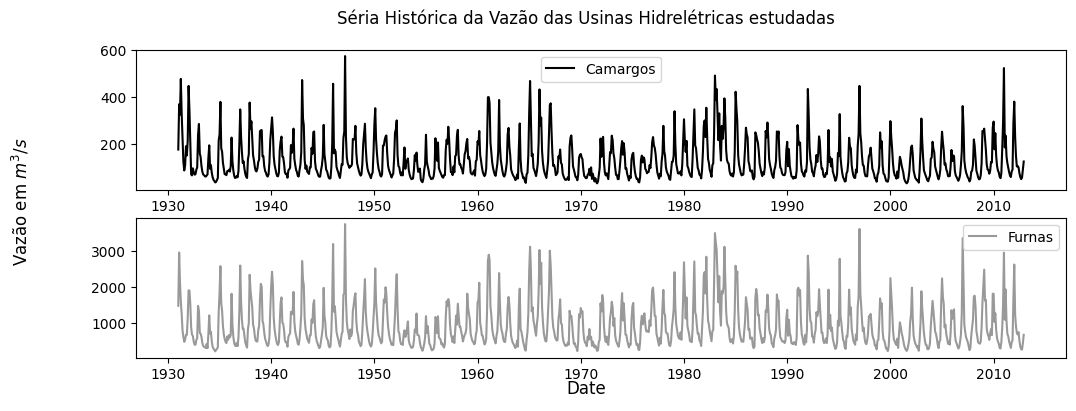

In [5]:
figure, axes = plt.subplots(2, 1, figsize=(12,4))
figure.suptitle(f'Séria Histórica da Vazão das Usinas Hidrelétricas estudadas')
figure.supylabel('Vazão em $m^3/s$')
figure.supxlabel('Date')
fig0 = sns.lineplot(ax=axes[0],data=df_teste,x='Date',y='Camargos', color = 'k', label="Camargos")


fig1 = sns.lineplot(ax=axes[1],data=df_teste,x='Date',y='Furnas', color = '#999', label="Furnas")

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_xlabel(' ')
axes[1].set_xlabel(' ')

plt.legend()
plt.savefig(f'Série histórica.png', format='png')
plt.show()

  


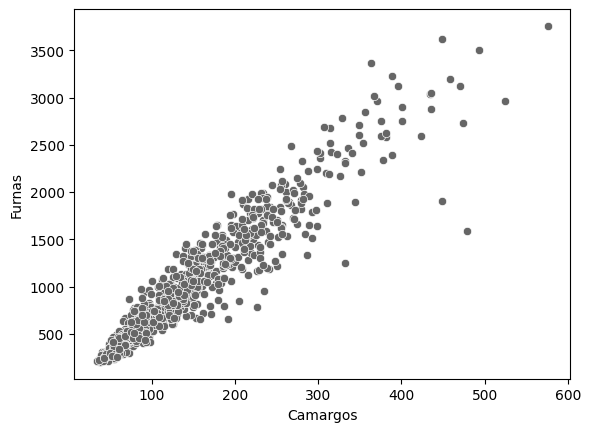

In [6]:
plt.figure()
sns.scatterplot(data=df_teste,x='Camargos',y='Furnas', color = '#666666')
min_furnas = df_teste['Furnas'].min()
min_camargos = df_teste['Camargos'].min()
max_furnas = df_teste['Furnas'].max()
max_camargos = df_teste['Camargos'].max()
#plt.legend()
plt.savefig(f'Dispersão histórica.png', format='png')
plt.show()



# axes[0].set_title(f'Rˆ2 - NARMAX R2: {r2_result:.3f}')
# axes[0].scatter(test[23], test['23_pred'])
# axes[0].plot([min, max], [min, max], 'k--', lw=2)
# axes[0].set_xlabel('Actual')
# axes[0].set_ylabel('Predicted')


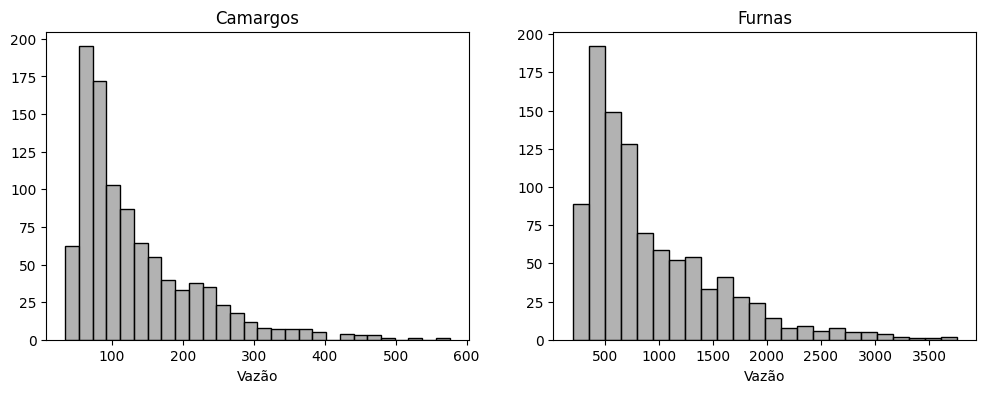

In [7]:
figure, axes = plt.subplots(1, 2, figsize=(12,4))
#figure.suptitle(f'Séria Histórica da Vazão das Usinas Hidrelétricas estudadas')
#figure.supylabel('Vazão em $m^3/s$')
#figure.supxlabel('Date')
fig0 = sns.histplot(ax=axes[0],data=df_teste,x='Camargos', color = '#999998', label="Camargos")
fig1 = sns.histplot(ax=axes[1],data=df_teste,x='Furnas', color = '#999', label="Furnas")

axes[1].set_title('Furnas')
axes[0].set_title('Camargos')

axes[0].set_ylabel('')
axes[1].set_ylabel('')


axes[0].set_xlabel('Vazão')
axes[1].set_xlabel('Vazão')
plt.savefig(f'Distribuição Séries.png', format='png')
plt.show()

  


In [8]:
df_teste.describe()

,Camargos,Furnas
count,984.000000,984.000000
mean,132.963415,926.026423
std,84.746986,615.739071
min,34.000000,204.000000
25%,72.000000,476.000000
50%,102.500000,705.000000
75%,169.250000,1234.000000
max,576.000000,3757.000000


In [9]:
df_teste.corr()

<ipython-input-9-0c3859c83909>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_teste.corr()


,Camargos,Furnas
Camargos,1.000000,0.953012
Furnas,0.953012,1.000000


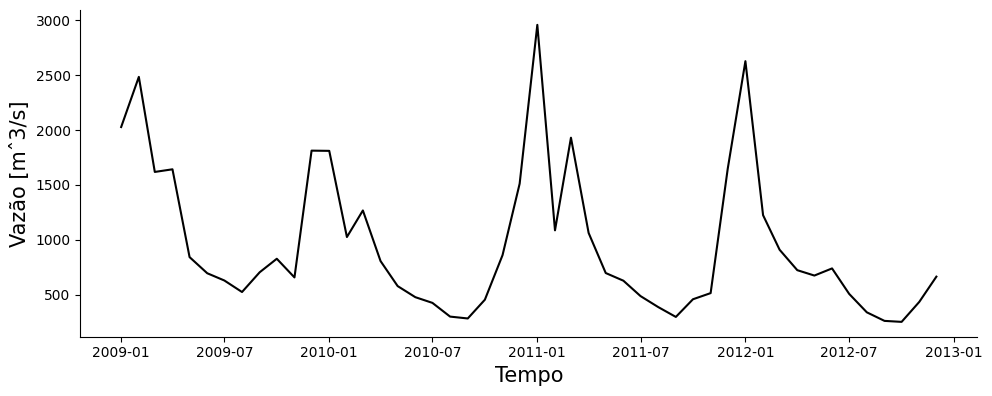

In [10]:
plt.figure(figsize=(10,4))
#sns.lineplot(data=df_normalized,x='Date',y='Camargos',markers='--r', label="Camargos")
sns.lineplot(data=df_teste[df_teste.Date >= '2009-01-01'],x='Date',y='Furnas', color = 'k') #, label="Furnas")
plt.tight_layout()
sns.despine(top=True)
#plt.subplots_adjust(left=0.05)
plt.ylabel('Vazão [mˆ3/s]', size=15)
plt.xlabel('Tempo', size=15)
#plt.legend(fontsize=15)
plt.savefig(f'Camargos Flow River Time Series.png', format='png')
plt.show();


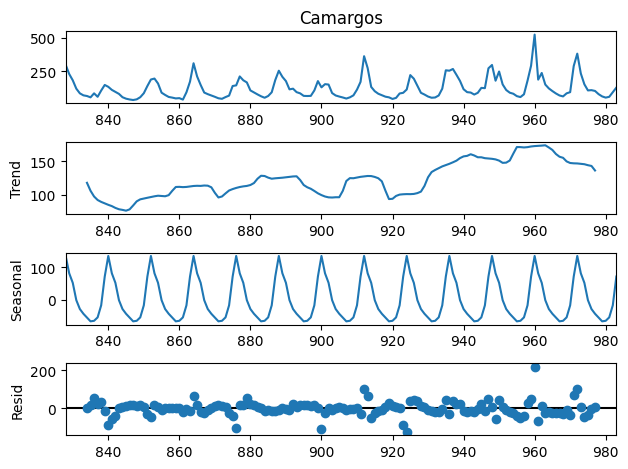

<Figure size 640x480 with 0 Axes>

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

result=seasonal_decompose(df_teste[df_teste['Date'] >= '2000-01-01']['Camargos'], model='aditive', period=12)
result.plot()
plt.show()
plt.savefig(f'Components Time Series.png', format='png')


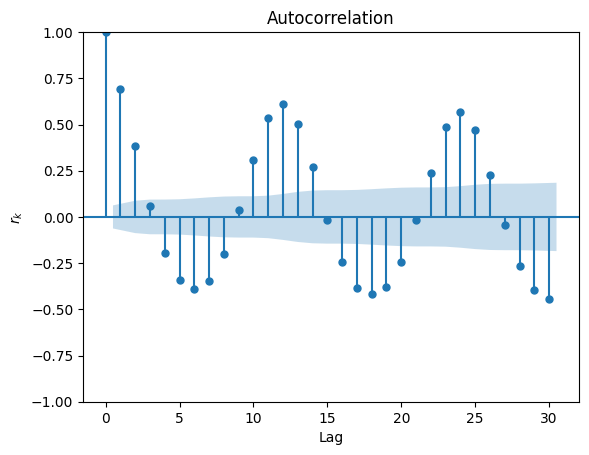

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(x=df_teste['Camargos'], lags=30)
# Show the AR as a plot
plt.ylabel(f'$r_k$')
plt.xlabel('Lag')
plt.savefig(f'Autocorrelation.png', format='png')
plt.show()

Coeficiente de Hurst = 0.572


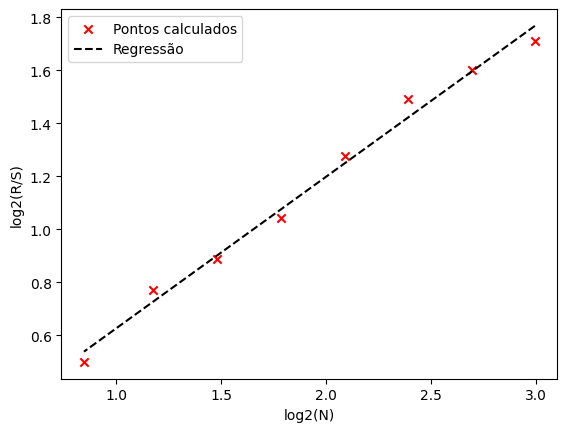

In [13]:
# Hurst Expoent calculation

#-- Basics Library and Data import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Size_final = []
RS_final = []
obj_sample = df_teste['Camargos'].to_numpy() 
size_max = len(obj_sample)
i = 1
while True:
  middle_process = []
  for obj_sample_sized in np.array_split(obj_sample, i,):
    actual_size = len(obj_sample_sized)
    mean = obj_sample_sized.mean()
    std = obj_sample_sized.std()
    Vk = (obj_sample_sized - mean).cumsum()
    range = Vk.max() - Vk.min()
    RS = range/std
    middle_process.append(RS)

  Size_final.append(len(Vk))
  RS_final.append(np.array(middle_process).mean())
  i = i*2
  if actual_size < 8:
    break

X_final = np.log10(Size_final)
Y_final = np.log10(RS_final)
z = np.polyfit(X_final, Y_final, 1)

print(f'Coeficiente de Hurst = {round(z[0],4)}')
plt.scatter(X_final,Y_final, label='Pontos calculados',marker = 'x',c='red')
plt.plot(X_final,z[0]*X_final + z[1],label='Regressão',linestyle = '--',c='black')
plt.xlabel('log2(N)')
plt.ylabel('log2(R/S)')
plt.legend()
plt.savefig('hurst_calc.png', format='png')